In [217]:
import pandas as pd
import numpy as np
#1
df1=pd.read_table('Albuquerque Home Prices.txt')
df1 = df1.replace(-9999, np.nan)
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


In [218]:
df1.apply(lambda x: sum(x.isnull()), axis=0)

PRICE     0
SQFT      0
AGE      49
FEATS     0
NE        0
CUST      0
COR       0
TAX      10
dtype: int64

In [219]:
from sklearn.linear_model import LinearRegression
y=pd.DataFrame(df1[df1['AGE'].isna()!=True]['AGE'])
x=pd.DataFrame(df1[df1['AGE'].isna()!=True]['PRICE'])
x_na=pd.DataFrame(df1[df1['AGE'].isna()==True]['PRICE'])
naindex=df1[df1['AGE'].isna()==True].index  
model = LinearRegression()
model.fit(x, y)
mv=model.predict(x_na).tolist()
for i in range(len(naindex)):
    df1.at[naindex[i],'AGE']=mv[i][0]
df1['TAX'] = df1['TAX'].fillna(df1['TAX'].mean())

In [220]:
df1.apply(lambda x: sum(x.isnull()), axis=0)

PRICE    0
SQFT     0
AGE      0
FEATS    0
NE       0
CUST     0
COR      0
TAX      0
dtype: int64

In [221]:
df1.shape

(117, 8)

In [222]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [223]:
x=df1.drop(['PRICE'], axis=1)
y=df1['PRICE']
from sklearn import preprocessing
norm = preprocessing.StandardScaler()
norm.fit(x)
ndf=norm.transform(x)
x = pd.DataFrame(ndf, index=x.index, columns=x.columns)
x.head()

,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,1.910228,-0.259523,2.479577,0.707107,1.825742,-0.481227,2.882411
1,1.814347,-0.558339,0.335903,0.707107,1.825742,-0.481227,1.004017
2,1.937074,-0.984092,1.050461,0.707107,1.825742,-0.481227,1.361969
3,2.429903,-1.294621,1.765019,0.707107,1.825742,-0.481227,2.868775
4,1.775994,-1.191111,0.335903,0.707107,1.825742,-0.481227,3.199454


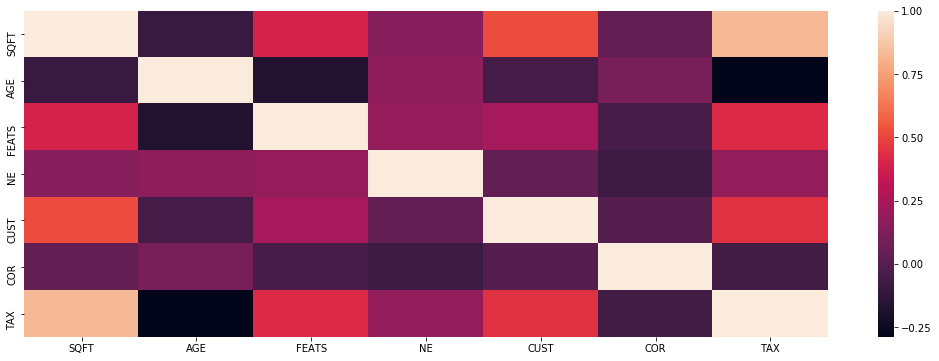

In [224]:
import seaborn as sns
sns.heatmap(x.corr())

In [225]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x.values, y, test_size=0.2, random_state=42)

In [226]:
from sklearn.model_selection import GridSearchCV
lreg_params = {'fit_intercept': [True,False]}
model1=GridSearchCV(LinearRegression(), lreg_params,cv=5, n_jobs=-1,
                        verbose=True)
tree_params = {'max_depth': range(1,11),
               'max_features': range(2,7)}
knn_params = {'knn__n_neighbors': range(1, 10)}
model2=GridSearchCV(DecisionTreeRegressor(random_state=17), tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)
from sklearn.pipeline import Pipeline
knn_pipe = Pipeline([('knn', KNeighborsRegressor(n_jobs=-1))])
model3=GridSearchCV(knn_pipe, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('knn',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=-1,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [227]:
model1.best_params_

{'fit_intercept': True}

In [228]:
model2.best_params_

{'max_depth': 6, 'max_features': 2}

In [229]:
model3.best_params_

{'knn__n_neighbors': 6}

In [230]:
y_pred1=model1.predict(x_valid)
y_pred2=model2.predict(x_valid)
y_pred3=model3.predict(x_valid)

Text(0.5, 1.0, 'Линейная регрессия')

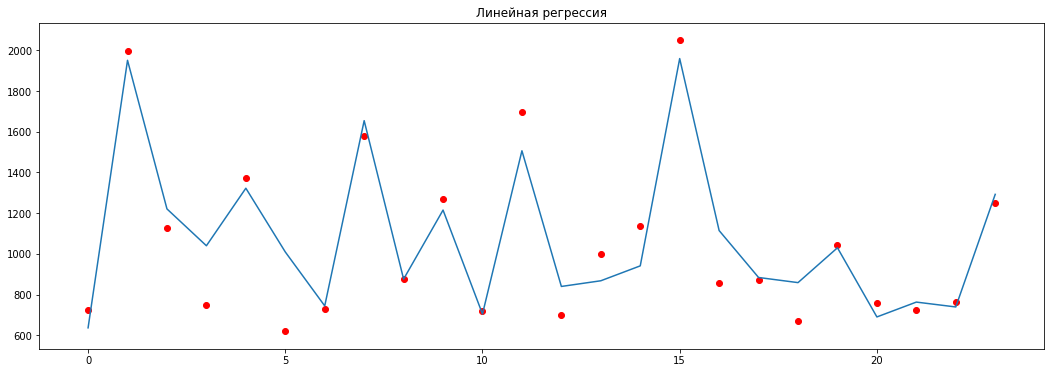

In [231]:
import matplotlib.pyplot as plt
x=[i for i in range(len(y_valid))]
plt.plot(x,y_pred1)
plt.scatter(x,y_valid, c='r')
plt.title('Линейная регрессия')

Text(0.5, 1.0, 'Дерево решений')

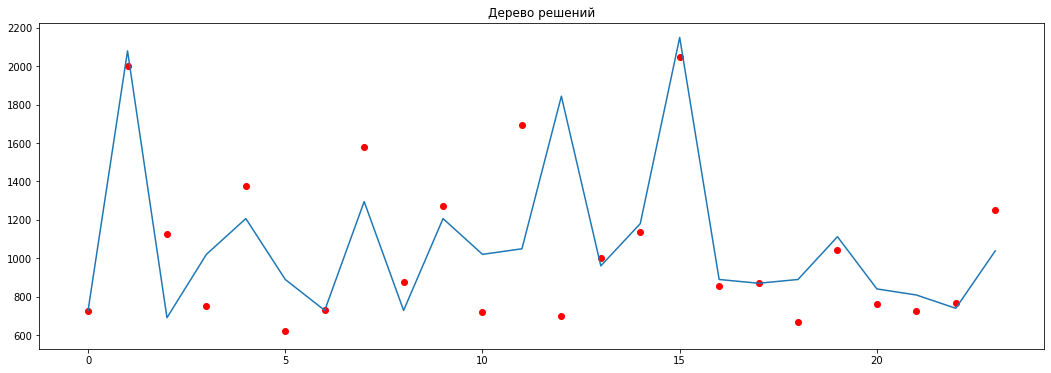

In [232]:
plt.plot(x,y_pred2)
plt.scatter(x,y_valid, c='r')
plt.title('Дерево решений')

Text(0.5, 1.0, 'К-средних')

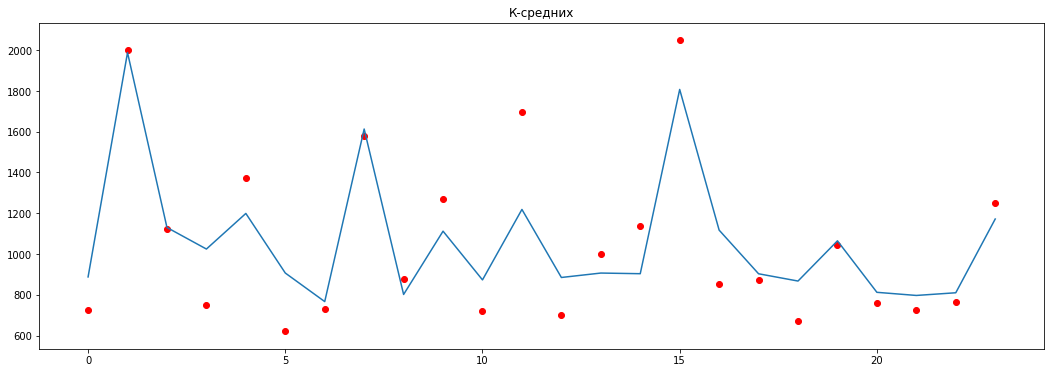

In [233]:
plt.plot(x,y_pred3)
plt.scatter(x,y_valid, c='r')
plt.title('К-средних')

In [234]:
from sklearn.metrics import mean_squared_error as MSE
min_price=df1['PRICE'].min()
max_price=df1['PRICE'].max()
mse1=np.sqrt(MSE(y_pred1,y_valid))
mse2=np.sqrt(MSE(y_pred2,y_valid))
mse3=np.sqrt(MSE(y_pred3,y_valid))
tab=pd.DataFrame([min_price, max_price, round(mse1,2), round(mse2,2), round(mse3,2)], 
                 index=['min_price', 'max_price', 'mse_linreg', 'mse_dtree', 'mse_knn'], columns=['Value'])
tab=tab.T
tab

,min_price,max_price,mse_linreg,mse_dtree,mse_knn
Value,540.0,2150.0,144.31,317.66,180.46


ВЫВОД:
Лучший проноз дает методом линейной регрессии, т.к. MSE принимает наименьшее значение 

In [235]:
#2
df2=pd.read_csv('day.csv')
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [236]:
df2=df2.drop(['dteday','casual','registered','weekday'], axis=1)
df2.head()

,instant,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,0,1,0,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,0,1,0,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [237]:
df2.apply(lambda x: sum(x.isnull()), axis=0)

instant       0
season        0
yr            0
mnth          0
holiday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [238]:
y=df2['cnt']
x=df2.drop(['cnt'], axis=1)
from sklearn import preprocessing
norm = preprocessing.StandardScaler()
norm.fit(x)
ndf=norm.transform(x)
x = pd.DataFrame(ndf, index=x.index, columns=x.columns)
x.head()

,instant,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed
0,-1.729683,-1.348213,-1.001369,-1.600161,-0.171981,-1.471225,1.110427,-0.826662,-0.679946,1.250171,-0.387892
1,-1.724944,-1.348213,-1.001369,-1.600161,-0.171981,-1.471225,1.110427,-0.721095,-0.740652,0.479113,0.749602
2,-1.720205,-1.348213,-1.001369,-1.600161,-0.171981,0.679706,-0.726048,-1.634657,-1.749767,-1.339274,0.746632
3,-1.715466,-1.348213,-1.001369,-1.600161,-0.171981,0.679706,-0.726048,-1.614780,-1.610270,-0.263182,-0.389829
4,-1.710728,-1.348213,-1.001369,-1.600161,-0.171981,0.679706,-0.726048,-1.467414,-1.504971,-1.341494,-0.046307


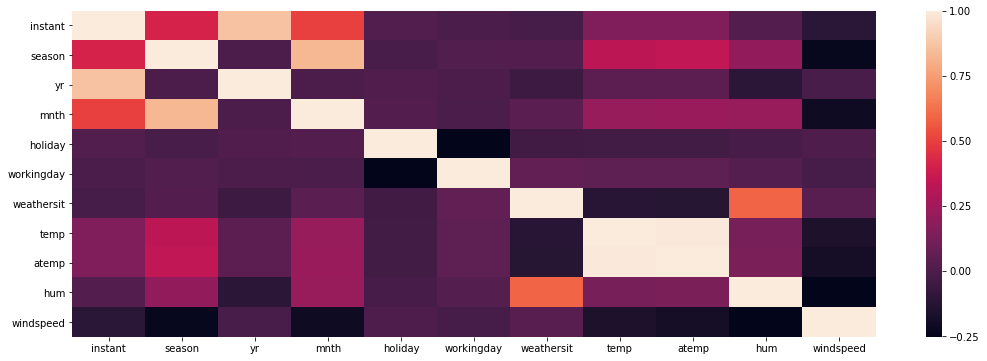

In [239]:
sns.heatmap(x.corr())

In [240]:
x=x.drop(['temp'], axis=1) # удалим переменную, поскольку это увеличит качество моделей

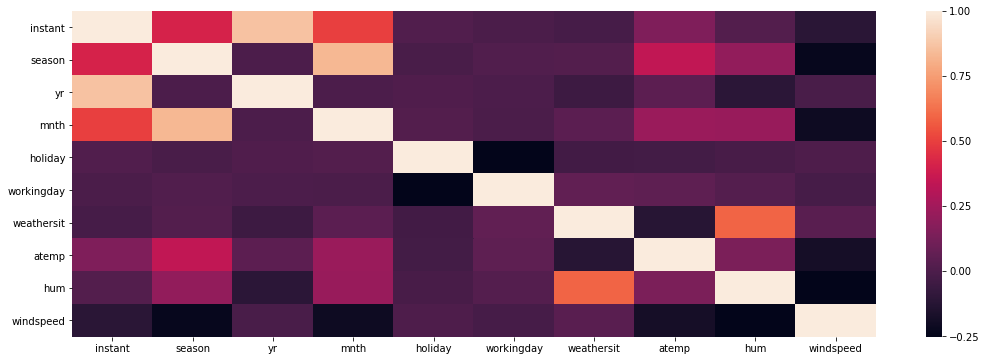

In [241]:
sns.heatmap(x.corr())

In [242]:
x_train, x_valid, y_train, y_valid = train_test_split(x.values, y, test_size=0.2, random_state=42)

In [243]:
from sklearn.model_selection import GridSearchCV
lreg_params = {'fit_intercept': [True,False]}
model1=GridSearchCV(LinearRegression(), lreg_params,cv=5, n_jobs=-1,
                        verbose=True)
tree_params = {'max_depth': range(1,11),
               'max_features': range(2,7)}
knn_params = {'knn__n_neighbors': range(1, 10)}
model2=GridSearchCV(DecisionTreeRegressor(random_state=17), tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)
from sklearn.pipeline import Pipeline
knn_pipe = Pipeline([('knn', KNeighborsRegressor(n_jobs=-1))])
model3=GridSearchCV(knn_pipe, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('knn',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=-1,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [244]:
model1.best_params_

{'fit_intercept': True}

In [245]:
model2.best_params_

{'max_depth': 7, 'max_features': 6}

In [246]:
model3.best_params_

{'knn__n_neighbors': 5}

In [247]:
y_pred1=model1.predict(x_valid)
y_pred2=model2.predict(x_valid)
y_pred3=model3.predict(x_valid)

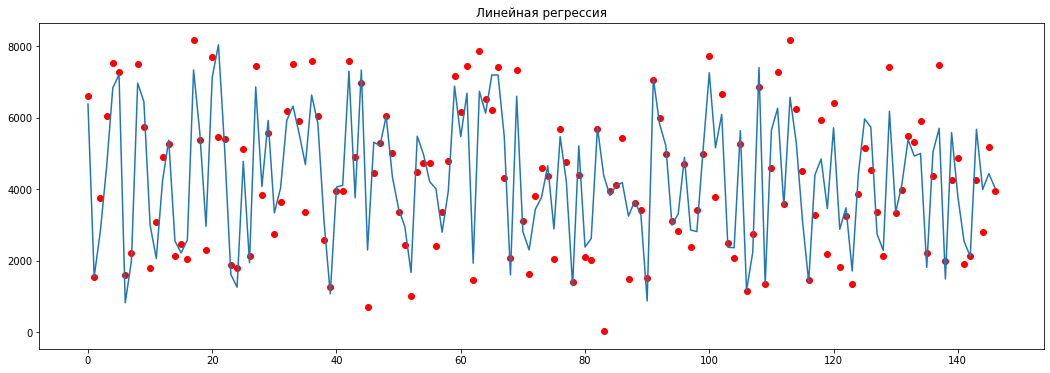

In [248]:
x=[i for i in range(len(y_valid))]
plt.plot(x,y_pred1)
plt.scatter(x,y_valid, c='r')
plt.title('Линейная регрессия')
plt.rcParams['figure.figsize'] = [18, 6]

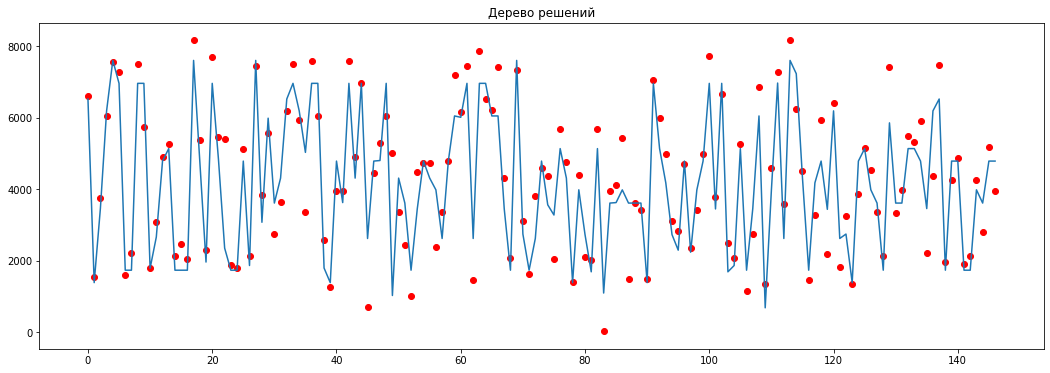

In [249]:
plt.plot(x,y_pred2)
plt.scatter(x,y_valid, c='r')
plt.title('Дерево решений')
plt.rcParams['figure.figsize'] = [18, 6]

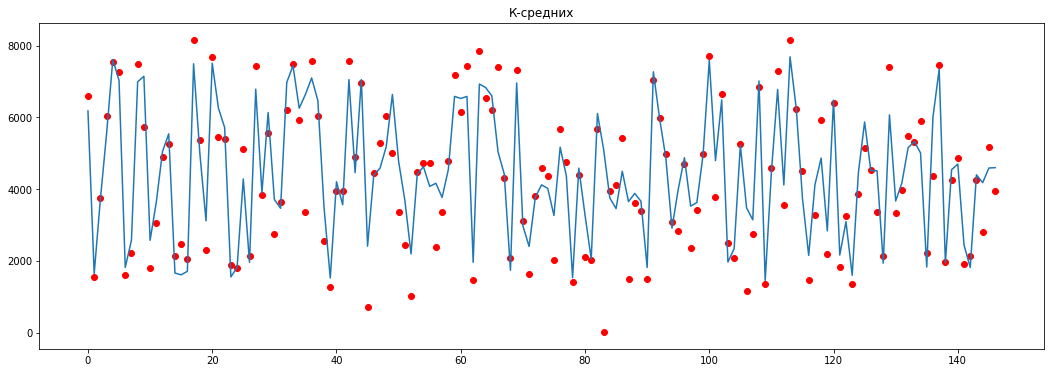

In [250]:
plt.plot(x,y_pred3)
plt.scatter(x,y_valid, c='r')
plt.title('К-средних')
plt.rcParams['figure.figsize'] = [18, 6]

In [251]:
min_price=df2['cnt'].min()
max_price=df2['cnt'].max()
mse1=np.sqrt(MSE(y_pred1,y_valid))
mse2=np.sqrt(MSE(y_pred2,y_valid))
mse3=np.sqrt(MSE(y_pred3,y_valid))
tab=pd.DataFrame([min_price, max_price, round(mse1,2), round(mse2,2), round(mse3,2)], 
                 index=['min_price', 'max_price', 'mse_linreg', 'mse_dtree', 'mse_knn'], columns=['Value'])
tab=tab.T
tab

,min_price,max_price,mse_linreg,mse_dtree,mse_knn
Value,22.0,8714.0,829.73,813.03,860.61


ВЫВОД:
Лучший проноз получился деревом решений, т.к. MSE принимает наименьшее значение    